In [1]:
import numpy as np

# NEMO3 Check
In 2016 Nemo3 gives $T_{1/2}^{0\nu}=2.0\times10^{22}y$,the phase space is $G^{0\nu}=63.03\times10^{-15}y^{-1}$, nuclear matrix elements spanning the range $M^{0\nu}=1.71-5.60$, the axial vector coupling $g_A=1.27$\cite{nemo-3_collaboration_measurement_2016}

In [35]:
def calcMee(T = 20,
G_0nu=63.03,
M0nu_l=1.71,
M0nu_r=5.6,
g_A = 1.27,
m_e=0.511):
    # T*10^21,G*10^-15,M_e*10^6
    m_ee = lambda M_0nu: np.sqrt(1/G_0nu/T)/M_0nu*1e3*m_e/g_A**2
    return m_ee(M0nu_l),m_ee(M0nu_r)

In [36]:
a=calcMee()
print(a)

(5.218295835038068, 1.5934439067705526)


# Proposal for 0nubb Nd150


In [124]:
import matplotlib.pyplot as plt
plt.rcParams.update(
    {
        "font.family": "serif",  # use serif/main font for text elements
        "font.serif": ["Times"],
        "text.usetex": True,  # use inline math for ticks
        "pgf.rcfonts": False,  # don't setup fonts from rc parameters
        "font.size": 13,
    }
)

In [37]:
sensi_u = np.load('0nu2b.npy')
sensi_l = np.load('0nu2bBad.npy')

In [39]:
years = np.arange(0.1,6,0.1)

In [42]:
meeList = np.zeros((2, sensi_l.shape[0]))
for i in range(sensi_l.shape[0]):
    tmp = calcMee(sensi_l[i]*np.log(2)*100)
    meeList[0,i] = tmp[1]
    meeList[1,i] = tmp[0]

In [116]:
meeListu = np.zeros((2, sensi_l.shape[0]))
for i in range(sensi_l.shape[0]):
    tmp = calcMee(sensi_u[i]*np.log(2)*100)
    meeListu[0,i] = tmp[1]
    meeListu[1,i] = tmp[0]

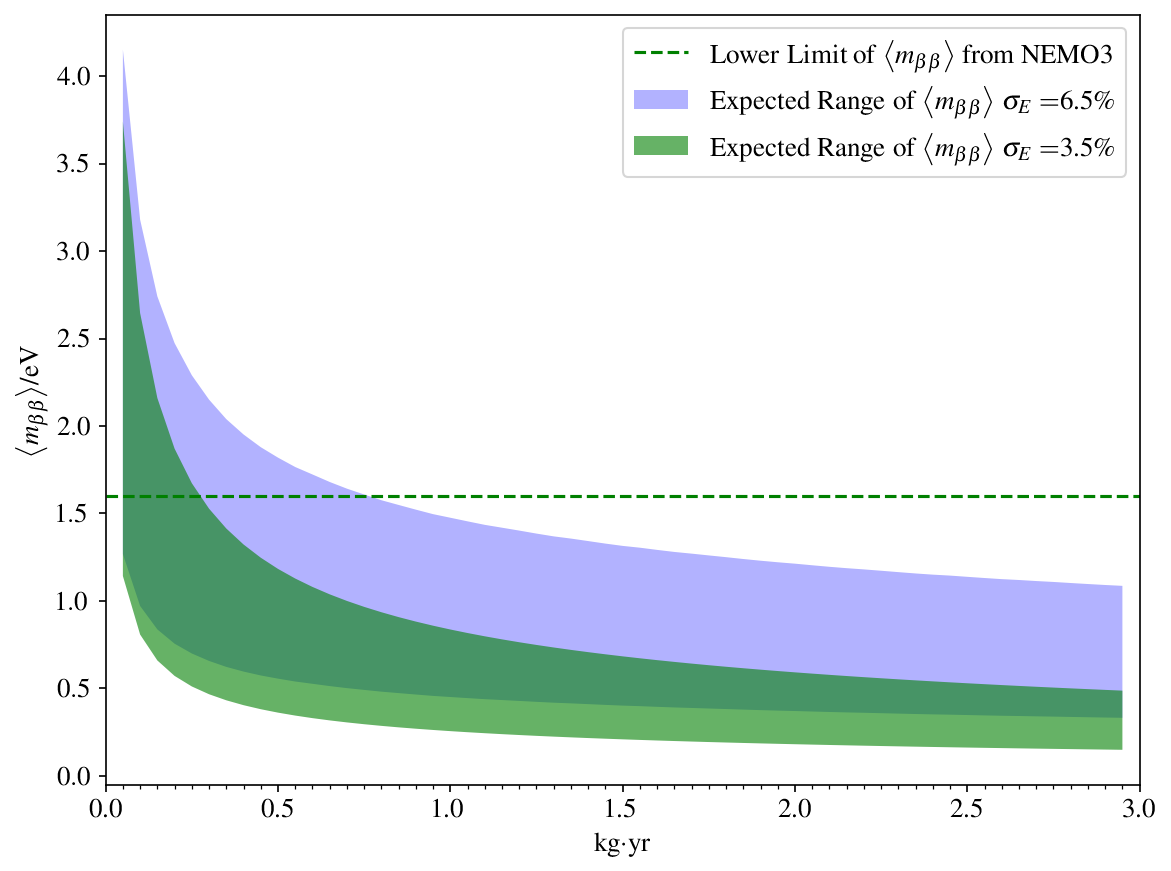

In [132]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
xminorLocator = MultipleLocator(0.1)
yminorLocator = MultipleLocator(1)
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
#ax.plot(years,meeList[0],color='b',linestyle='--')
#ax.plot(years,meeList[1],color='b')
ax.fill_between(years, meeList[0], meeList[1], alpha=0.3,facecolor='b', label=r'Expected Range of $\left<m_{\beta\beta}\right>$ $\sigma_E=$6.5\%')
ax.fill_between(years, meeListu[0], meeListu[1], alpha=0.6,facecolor='g', label=r'Expected Range of $\left<m_{\beta\beta}\right>$ $\sigma_E=$3.5\%')
#ax.scatter(0.1, 0.2/np.log(2),s=80, marker=(5, 1),label=r'$0\nu\beta\beta$ Nemo3', color='r')
ax.axhline(1.6,color='g',linestyle='--', label=r'Lower Limit of $\left<m_{\beta\beta}\right>$ from NEMO3')
#ax.legend(labelcolor='b')
ax.legend()
ax.set_xlabel('kg$\cdot$yr')
ax.set_ylabel(r'$\left<m_{\beta\beta}\right>$/eV')
#ax.yaxis.label.set_color('b')
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.set_xticks(np.arange(7))
ax.set_xticklabels(np.arange(7)*0.5)
#ax.tick_params(axis='y', colors='b')
#ax.spines['left'].set_color('b')
#ax.axhline(5.3,color='g',linestyle='--')
#ax.fill_between(years, meeList[0], meeList[1], alpha=0.3,facecolor='b', label=r'$m_\nu$')
ax.set_xlim([0,6])
plt.tight_layout()
plt.savefig('estimatem_nu.pdf')

In [141]:
years.shape

(59,)

In [127]:
years[14]
print(calcMee(sensi_l[14]*np.log(2)*100))
print(calcMee(sensi_u[14]*np.log(2)*100))

(1.6083358589624437, 0.4911168426474605)
(0.9658974509985794, 0.29494368592992337)


In [128]:
years[29]
print(calcMee(sensi_l[29]*np.log(2)*100))
print(calcMee(sensi_u[29]*np.log(2)*100))

(1.314481674286779, 0.40138636839828434)
(0.6829926375318963, 0.20855668038920408)


In 3 years, 1.5kgyr, [1.6083358589624437, 0.4911168426474605]

scale to 500t, 0.5*500*3=1.5*500kgyr

In [143]:
print(calcMee(sensi_l[29]*500*np.log(2)*100))
print(calcMee(sensi_u[29]*500*np.log(2)*100))

(0.058785407577659515, 0.017950544099606745)
(0.030544359313063884, 0.009326938290239152)


In [59]:
sensi_l[14]*np.log(2)

2.1053965097258827

In [60]:
s2_12=0.31
s2_13=0.02241
dm2_21=7.39*1e-5
dm2_31=2.523*1e-3

In [91]:
def mbb_U(m_1,s2_12=s2_12,
s2_13=s2_13,
dm2_21=dm2_21,
dm2_31=dm2_31):
    return (1-s2_13)*(m_1*(1-s2_12)+s2_12*np.sqrt(m_1**2+dm2_21))+s2_13*np.sqrt(m_1**2+dm2_31)
def mbb_L(m_1,s2_12=s2_12,
s2_13=s2_13,
dm2_21=dm2_21,
dm2_31=dm2_31):
    m_12u = (1-s2_13)*(m_1*(1-s2_12)+s2_12*np.sqrt(m_1**2+dm2_21))
    m_12l = (1-s2_13)*(-m_1*(1-s2_12)+s2_12*np.sqrt(m_1**2+dm2_21))
    m3 = s2_13*np.sqrt(m_1**2+dm2_31)
    #print(m_12u,m_12l,m3)
    return np.where(((m_12u>m3)&(np.abs(m_12l)<m3)),0,np.min(np.vstack((np.abs(m_12u-m3),np.abs(m_12l-m3),np.abs(m_12l+m3))),axis=0))

In [100]:
def mbbIO_U(m_3,s2_12=s2_12,
s2_13=s2_13,
dm2_21=dm2_21,
dm2_31=dm2_31):
    m_1=np.sqrt(m_3**2+dm2_31)
    return (1-s2_13)*(m_1*(1-s2_12)+s2_12*np.sqrt(m_1**2-dm2_21))+s2_13*m_3
def mbbIO_L(m_3,s2_12=s2_12,
s2_13=s2_13,
dm2_21=dm2_21,
dm2_31=dm2_31):
    m_1=np.sqrt(m_3**2+dm2_31)
    m_12l = (1-s2_13)*(-m_1*(1-s2_12)+s2_12*np.sqrt(m_1**2-dm2_21))
    m3 = s2_13*m_3
    return np.abs(m_12l+m3)

In [63]:
m_1s = np.arange(1e-4,2,1e-4)
mbb_Us = mbb_U(m_1s)

In [92]:
mbb_Ls = mbb_L(m_1s)

In [98]:
mbbIO_Us=mbbIO_U(m_1s)

In [101]:
mbbIO_Ls = mbbIO_L(m_1s)

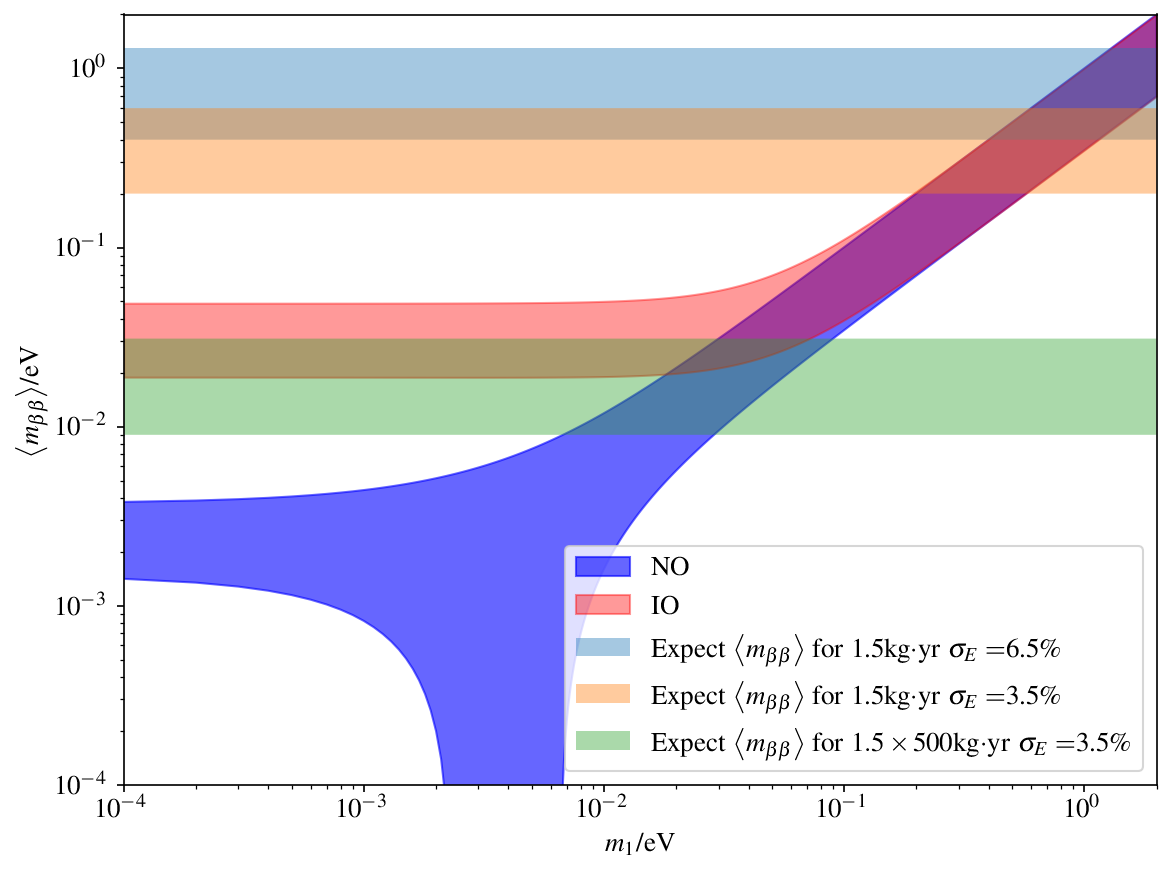

In [144]:

fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.fill_between(m_1s,mbb_Ls,mbb_Us,color='b',alpha=0.6,label='NO')

ax.fill_between(m_1s,mbbIO_Ls,mbbIO_Us,color='r',alpha=0.4,label='IO')
ax.fill_between(m_1s,np.repeat([0.4],m_1s.shape[0]),np.repeat([1.3],m_1s.shape[0]),alpha=0.4, label=r'Expect $\left<m_{\beta\beta}\right>$ for 1.5kg$\cdot$yr $\sigma_E=$6.5\%')
ax.fill_between(m_1s,np.repeat([0.2],m_1s.shape[0]),np.repeat([0.6],m_1s.shape[0]),alpha=0.4, label=r'Expect $\left<m_{\beta\beta}\right>$ for 1.5kg$\cdot$yr $\sigma_E=$3.5\%')
ax.fill_between(m_1s,np.repeat([0.009],m_1s.shape[0]),np.repeat([0.031],m_1s.shape[0]),alpha=0.4, label=r'Expect $\left<m_{\beta\beta}\right>$ for $1.5\times500$kg$\cdot$yr $\sigma_E=$3.5\%')

ax.legend(loc='lower right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim([1e-4,2])
ax.set_xlim([1e-4,2])
ax.set_xlabel(r'$m_1$/eV')
ax.set_ylabel(r'$\left<m_{\beta\beta}\right>$/eV')
plt.tight_layout()
plt.savefig('IONOm_ee.pdf')